**Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy.optimize
from scipy.optimize import curve_fit
import scipy.stats
from scipy.stats import chisquare

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Data**

In [ ]:
path0 = "/content/drive/My Drive/192CHI2/batch_0.csv"
path1 = "/content/drive/My Drive/192CHI2/batch_1.csv"
path2 = "/content/drive/My Drive/192CHI2/batch_2.csv"
path3 = "/content/drive/My Drive/192CHI2/batch_3.csv"

data0 = pd.read_csv(path0, low_memory=False)
data1 = pd.read_csv(path1, low_memory=False)
data2 = pd.read_csv(path2, low_memory=False)
data3 = pd.read_csv(path3, low_memory=False)

**Concatenating Data**

In [ ]:
dataa = [data0, data1, data2, data3]
data = pd.concat(dataa)

**Choosing which data columns to use**

In [ ]:
data_NCR = data.loc[data["RegionRes"] == "NCR"]

date = pd.to_datetime(data_NCR["DateRepConf"])
total_per_day = date.value_counts().sort_index().reset_index()

In [ ]:
data_NCR = data_NCR.reset_index()

data_NCR.loc[:, "DateRepConf"] = pd.to_datetime(data_NCR["DateRepConf"])

<ipython-input-6-2b3a43b733f9>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_NCR.loc[:, "DateRepConf"] = pd.to_datetime(data_NCR["DateRepConf"])


In [ ]:
data_req = data_NCR[data_NCR["DateRepConf"]<=datetime.datetime(2022,9,30)]
data_day = data_req.groupby(["DateRepConf"])["CaseCode"].count().to_frame()

**Plotting the data**

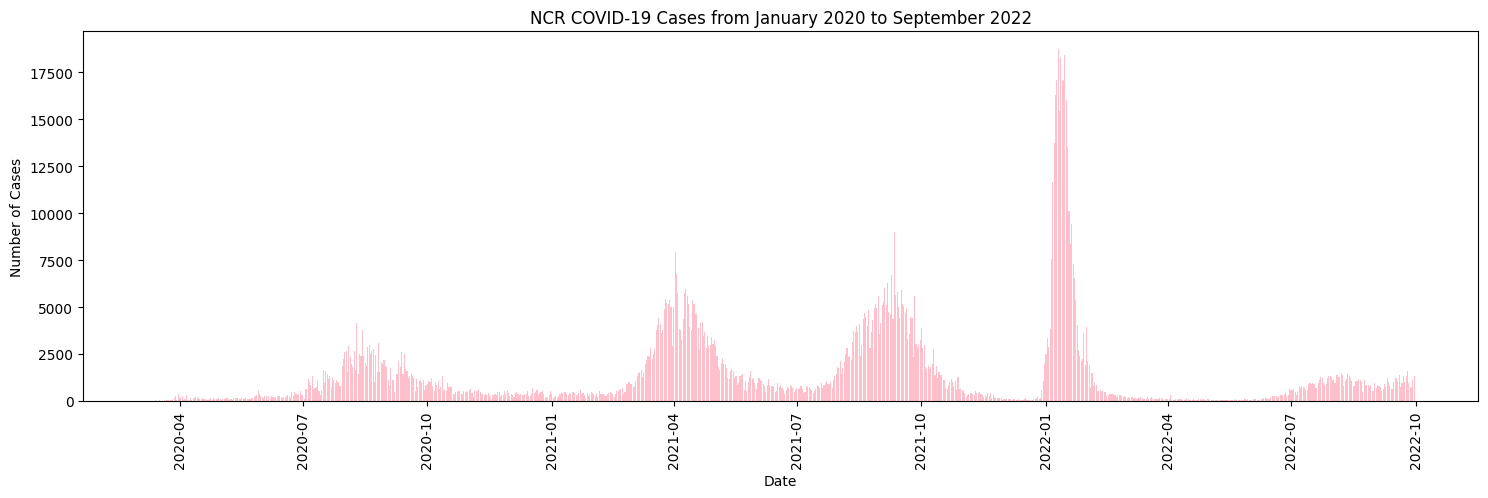

In [ ]:
fig = plt.figure(dpi=100)
plt.bar(data_day.index, data_day["CaseCode"], color = "pink")
plt.xticks(rotation=90)
plt.title("NCR COVID-19 Cases from January 2020 to September 2022")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
fig.set_figwidth(18)
plt.show()

**Regression Analysis: Linear Regression and Polynomial Regression**

In [ ]:
date = pd.to_datetime(data_NCR["DateRepConf"])
total_per_day = date.value_counts().sort_index().reset_index()

x = np.arange(len(total_per_day["DateRepConf"]))
y = np.array(total_per_day["DateRepConf"])

coefficients_1 = np.polyfit(x, y, deg = 1)
poly_fit_1 = np.poly1d(coefficients_1)
y_new_1 = poly_fit_1(x)

coefficients_2 = np.polyfit(x, y, deg = 2)
poly_fit_2 = np.poly1d(coefficients_2)
y_new_2 = poly_fit_2(x)

coefficients_3 = np.polyfit(x, y, deg = 3)
poly_fit_3 = np.poly1d(coefficients_3)
y_new_3 = poly_fit_3(x)

coefficients_15 = np.polyfit(x, y, deg = 15)
poly_fit_15 = np.poly1d(coefficients_15)
y_new_15 = poly_fit_15(x)

x_plot = np.array(total_per_day["index"])

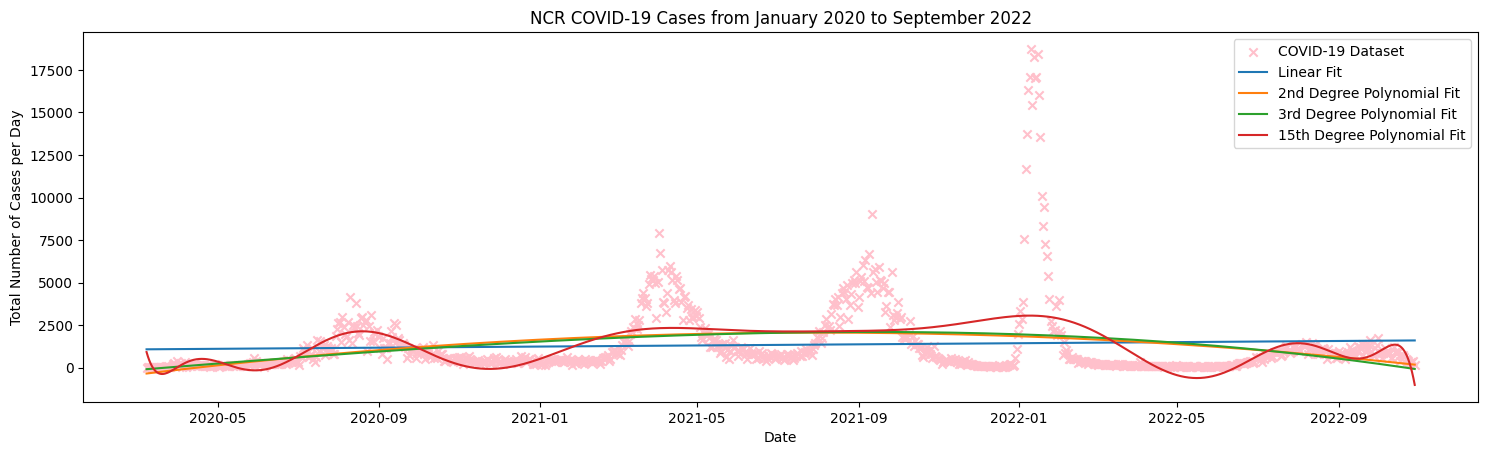

In [ ]:
fig = plt.figure(dpi=100)
plt.scatter(x_plot, y, color = "pink", marker = "x", label = "COVID-19 Dataset")
plt.plot(x_plot, y_new_1, label = "Linear Fit")
plt.plot(x_plot, y_new_2, label = "2nd Degree Polynomial Fit")
plt.plot(x_plot, y_new_3, label = "3rd Degree Polynomial Fit")
plt.plot(x_plot, y_new_15, label = "15th Degree Polynomial Fit")
plt.legend()
plt.title("NCR COVID-19 Cases from January 2020 to September 2022")
plt.xlabel("Date")
plt.ylabel("Total Number of Cases per Day")
fig.set_figwidth(18)
plt.show()

**Chi-Square Test**

In [ ]:
def cs(obs, exp):
    return chisquare(obs, np.sum(obs)/np.sum(exp) * exp)

In [ ]:
print(cs(y, y_new_1))
print(cs(y, y_new_2))
print(cs(y, y_new_3))
print(cs(y, y_new_15))

Power_divergenceResult(statistic=3408006.221910707, pvalue=0.0)
Power_divergenceResult(statistic=2476880.7032373264, pvalue=0.0)
Power_divergenceResult(statistic=2480073.423491395, pvalue=0.0)
Power_divergenceResult(statistic=2002294.74580716, pvalue=0.0)


We can see that data from the range from January 2020 to September 2022 shows four major spikes. The highest being at the start of the year of 2022.

All curve fitting: linear, 2nd degree polynomial fit, 3rd degree, and even 15th degree do not perform well. This maybe associated to the fact that the characteristics and behavior of the surges of COVID-19 in NCR is complex enough that it cannot be boxed onto linear and polynomial approximations. An exponential? logarithmic? Others may be attempted in order predict the behavior and have a working model.

Additionally, linear, and 2nd to 3rd degree polynomial curve fitting may work if data were segmented into time periods where different levels of restrictions were declared.